# Logistic Regression

In [1]:
# Import NumPy and Pandas to retrieve stock info and set up dataframes for basic analysis
import numpy as np
from numpy.random import randn
import pandas as pd

# Import stats library from numpy
from scipy import stats

# These are the plotting modules and libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

# Change Theme of plots for better visualization
from jupyterthemes import jtplot

jtplot.style(context='talk', fscale=1, spines=True, gridlines='--')

In [2]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

## Basic Mathematical Overview

First, let's take a look at the Logistic Function. The logistic function can take an input from negative to positive infinity and it has always has an output between 0 and 1. The logistic function is defined as:$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

A graph of the logistic function looks like this:

Text(0.5, 1.0, ' Logistic Function ')

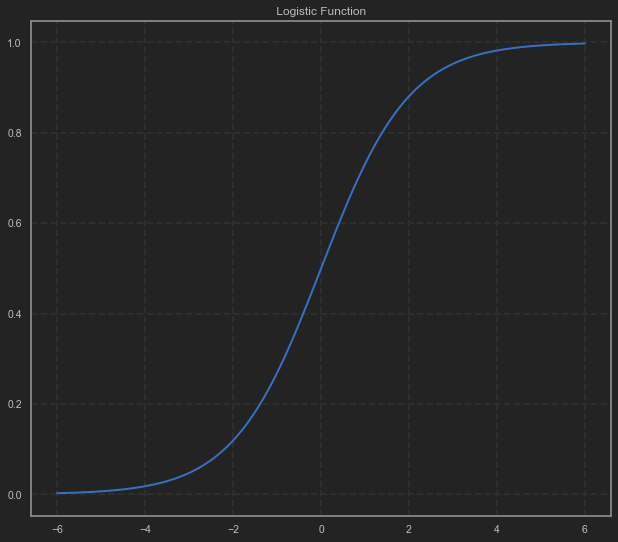

In [3]:
import math # For exponential function

# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

We could describe a Linear Regression Function model as:$$ y_i = \beta _1 x_{i1} + ... + \beta _i x_{ip}$$

Which was basically an expanded linear equation (y=mx+b) for various x data features. In the case of the above equation, we presume a data set of 'n' number of units, so that the data set would have the form:$$ [ y_i, x_{i1},...,x_{ip}]^{n}_{i=1}$$

For our logistic function, if we view t as a linear function with a variable x we could express t as:$$ t = \beta _0 + \beta _1 x $$

Here, we've basically just substituted a linear function (form similar to y=mx+b) for t. We could then rewrite our logistic function equation as:$$ F(x)= \frac{1}{1+e^{-(\beta _0 + \beta _1 x)}}$$

Now we can interpret F(x) as the probability that the dependent variable is a "success" case, this is a similar style of thinking as in the Binomial Distribution, in which we had successes and failures. So the formula for F(x) that we have here states that the probability of the dependent variable equaling a "success" case is equal to the value of the logistic function of the linear regression expression (the linear equation we used to replace t ).

Inputting the linear regression expression into the logistic function allows us to have a linear regression expression value that can vary from positive to negative infinity, but after the transformation due to the logistic expression we will have an output of F(x) that ranges from 0 to 1.

We can now perform a binary classification based on where F(x) lies, either from 0 to 0.5, or 0.5 to 1.

## Dataset Analysis


The dataset is packaged within Statsmodels. It is a data set from a 1974 survey of women by Redbook magazine. Married women were asked if they have had extramarital affairs. The data set hyperlink is https://www.statsmodels.org/stable/datasets/generated/fair.html

It is important to note that this data comes from a self-reported survey, which can have many issues as far as the accuracy of the data. Also this analysis isn't trying to promote any agenda concerning women or marriage, the data is just interesting but its accuracy should be met with a healthy dose of skepticism.

We'll ignore those issues concerning the data and just worry about the logistic regression aspects to the data.

In this case we will approach this as a classification problem by asking the question:

Given certain variables for each woman, can we classify them as either having participated in an affair, or not participated in an affair?

Number of observations: 6366

Number of variables: 9

Variable name definitions:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


## Data Visualisation

In [4]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [5]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


Start our classfication by creating a new column called 'Had_Affair'. 

We will set this column equal to 0 if the affairs column is 0, meaning no time spent in affairs. 

Otherwise the 'Had_Affair' value will be set as 1, indicating that the woman had an affair.

In [6]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


Looking at this brief glance of the data, it seems that the women who had affairs were slightly older,married longer, and slightly less religious and less educated. However, the mean values of both classes are very close for all variables.

Let's go ahead and try to visualize some of this data.

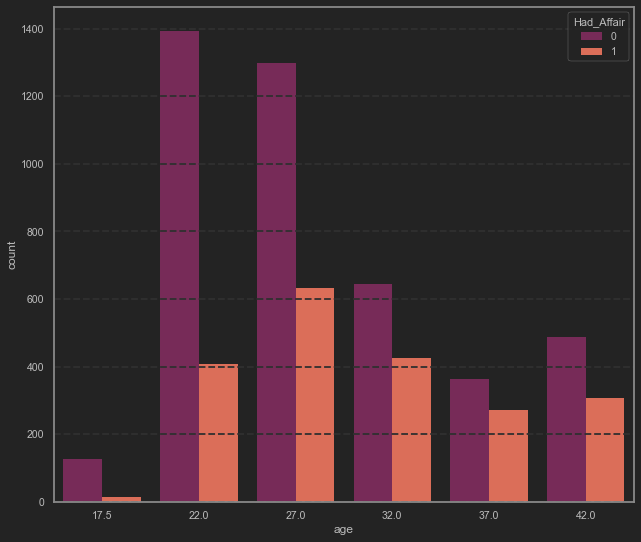

In [8]:
# Countplot for age with Had Affair hue
sns.countplot('age',data=df,hue='Had_Affair',palette='rocket')

This suggests a higher probability of an affair as age increases. Let's check the number of years married.

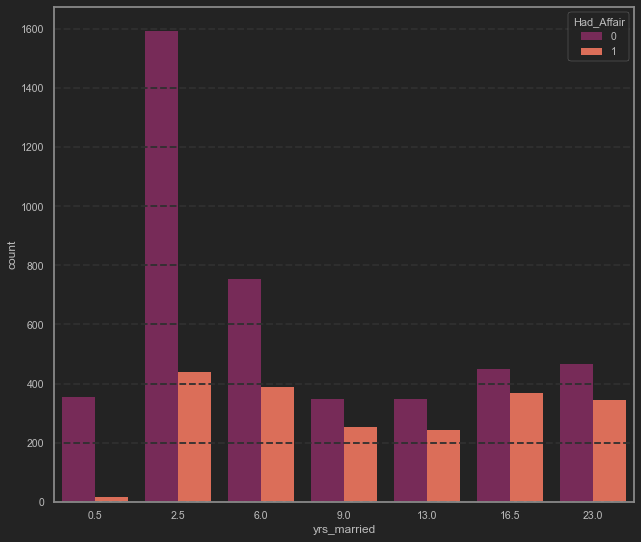

In [9]:
sns.countplot('yrs_married',data=df,hue='Had_Affair',palette='rocket')


Looks like probability of having an affair increases with the number of years married. Let's check the number of children.

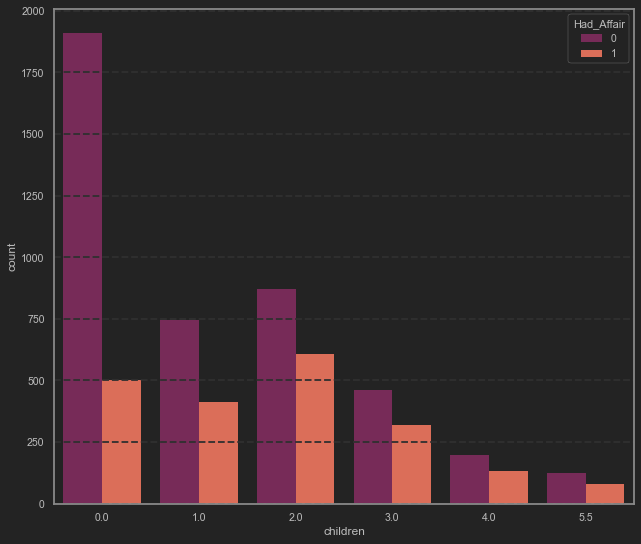

In [10]:
sns.countplot('children',data=df,hue='Had_Affair',palette='rocket')


Pretty strong evidence suggesting that less children results in a lower probability of an affair. Finally let's check the education level.

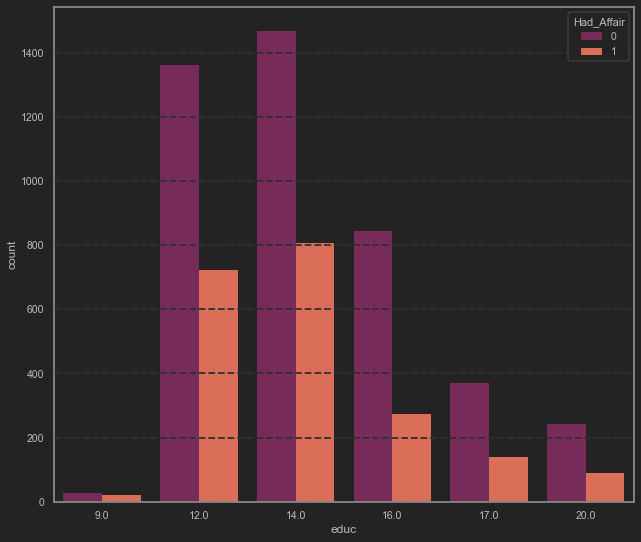

In [11]:
sns.countplot('educ',data=df,hue='Had_Affair',palette='rocket')

Strong evidence suggesting that less educated people results in a higher probability of an affair. Lets check the opinion of the marriage:

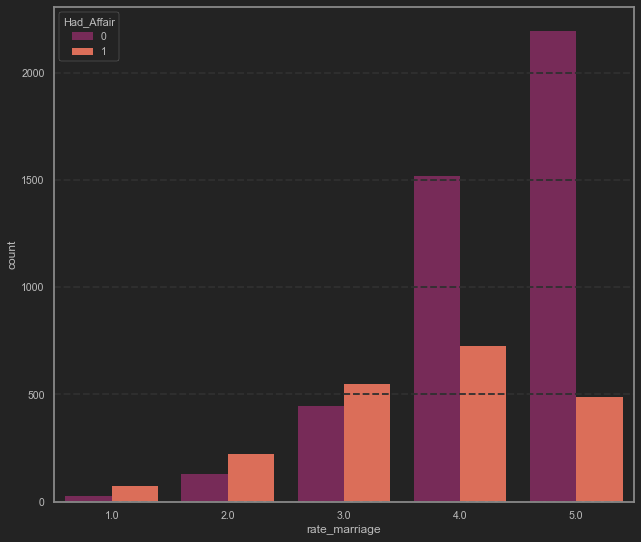

In [12]:
sns.countplot('rate_marriage',data=df,hue='Had_Affair',palette='rocket')

Those who rated their marriage highly had a lower probability of having an affair. Finally, lets check the occupation:

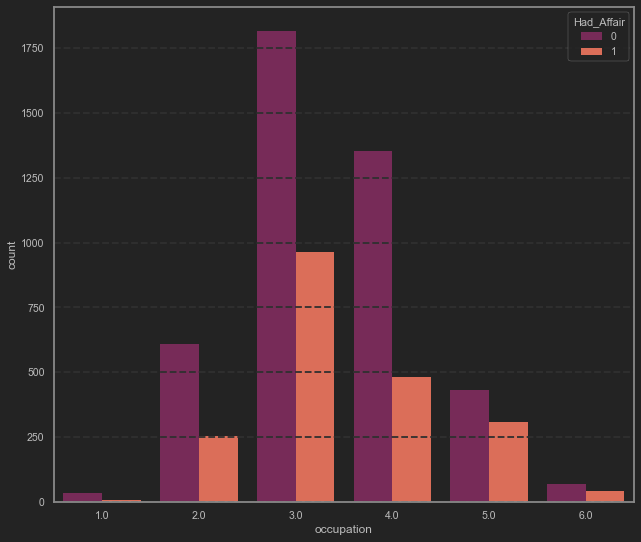

In [13]:
sns.countplot('occupation',data=df,hue='Had_Affair',palette='rocket')

Here we see that Students and professionals with advanced degrees have a lower likelihood of having an affair, whilst the other occupations have a relatively high probability of having an affair.

## Data Preparation

If we look at the data, we'll notice that two columns are unlike the others. Occupation and Husband's Occupation. These columns are in a format know as Categorical Variables. They are in set quantity/category, so that 1.0 and 2.0 are seperate variables, not continuous values along a spectrum that goes from 1-2 (e.g. There is no 1.5 for the occupation column). Pandas has a built-in method of getting dummy variables and creating new columns from them.

In [14]:
occ_dummies = pd.get_dummies(df['occupation'])

hocc_dummies = pd.get_dummies(df['occupation_husb'])

In [15]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


Can see above that pd.get_dummies() shows which category is in each row. This will be essential for producing the model.

Need to change the names of the columns to be more understandable.

In [16]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6'] # occupation 1,2,3,...,6
hocc_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6'] # husband occupation 1,2,3,...,6

# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hocc_dummies],axis=1)

# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [17]:
Y = df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

## Multicollinearity Check


Now we need to get rid of a few columns. We will be dropping the occ1 and hocc1 columns to avoid multicollinearity. Multicollinearity occurs due to the dummy variables we created. This is because the dummy variables are highly correlated, our model begins to get distorted because one of the dummy variables can be linearly predicted from the others. We take care of this problem by dropping one of the dummy variables from each set, we do this at the cost of losing a data set point.

The other column we will drop is the affairs column. This is because it is basically a repeat of what will be our Y target, instead of 0 and 1 it just has 0 or a number, so we'll need to drop it for our target to make sense.

In [18]:
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)
X = X.drop('affairs',axis=1)

X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In order to use the Y with SciKit Learn, we need to set it as a 1-D array. This means we need to "flatten" the array. Numpy has a built in method for this called ravel.

In [19]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

## Logistic Regression with SciKit Learn

We'll create the model, fit the data into the model, and then check our accuracy score. Afterwards, we'll split the data into testing and training sets and see if our results improve.

In [20]:
# Initiating the model
# Create LogisticRegression model
log_model = LogisticRegression(max_iter=4000)

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.7262016965127238

Looks like we got a 73% accuracy rating. Let's go ahead and compare this to the original Y data. We can do this by simply taking the mean of the Y data, since it is in the format 1 or 0, we can use the mean to calulate the percentage of women who reported having affairs. This is known as checking the null error rate.

In [21]:
# Check percentage of women that had affairs
Y.mean()

0.3224945020420987

This means that if our model just simply guessed "no affair" we would have had 1-0.32=0.68 accuracy (or 68%) accuracy. So while we are doing better than the null error rate, we aren't doing that much better.

Check the coefficients of our model to check what seemed to be the stronger predictors.

In [22]:
# Use zip to bring the column names and the np.transpose function to bring together the coefficients from the model
coeff_df = pd.DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.7089053315473469]
1,age,[-0.06069879645989037]
2,yrs_married,[0.10763044183753818]
3,children,[0.01616293121570577]
4,religious,[-0.37495364490973365]
5,educ,[-0.0010750099467673685]
6,occ2,[0.04895340961826497]
7,occ3,[0.3639165718210657]
8,occ4,[0.1316107371559938]
9,occ5,[0.7101801977853631]


Looking at the coefficients, we can see that a positive coeffecient corresponds to increasing the likelihood of having an affair while a negative coefficient means it corresponds to a decreased likelihood of having an affair as the actual data value point increases.

As you might expect, an increased marriage rating corresponded to a decrease in the likelihood of having an affair. Increased religiousness also seems to correspond to a decrease in the likelihood of having an affair.

Since all the dummy variables (the wife and husband occupations) are positive that means the lowest likelihood of having an affair corresponds to the baseline occupation we dropped (1-Student), which is cemented by our previous visualisation..

## Testing and Training Data

In [23]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# Make a new log_model
log_model2 = LogisticRegression(max_iter=4000)

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(max_iter=4000)

In [24]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print (metrics.accuracy_score(Y_test,class_predict))

0.7187053783912423


Now we have a 72.68% accuracy score, which is basically the same as our previous accuracy score, 72.58%.